<center>
<h1> TP-Projet d'optimisation numérique </h1>
<h1> Algorithme des régions de confiance </h1>
</center>

# Régions de confiance avec Pas de Cauchy 

## Implémentation 

1. Coder l'algorithme du pas de Cauchy dans le fichier `src/cauchy.jl`). La spécification de cet algorithme est donnée dans le fichier.
2. Ecrire des tests exhaustifs (qui testent tous les cas de figure possibles) pour votre algorithme du pas de Cauchy. Vous remplirez pour cela le fichier `test/tester_cauchy.jl` sur le modèle des autres fichiers de tests et vous exécuterez dans la cellule de code ci-après ces tests.

In [19]:
include("../src/cauchy.jl")         # votre algorithme
include("../test/tester_cauchy.jl") # la fonction pour tester votre algorithme

#
tester_cauchy(cauchy); # tester l'algorithme

Test Summary: | Pass  Total  Time
Pas de Cauchy |    9      9  0.0s


3. Coder l'algorithme des régions de confiance (fichier `src/regions_de_confiance.jl`). Sa spécification est donnée dans le fichier.
4. Vérifier que les tests ci-dessous passent.

In [73]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_cauchy.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_cauchy(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false



Test Summary:        | Pass  Total  Time
RC et pas de Cauchy  |   15     15  1.0s


## Interprétation 

<!-- Pour ces questions, des représentations graphiques sont attendues pour corroborer vos réponses. -->

1. Soit la fonction $f_1 \colon \mathbb{R}^3 \to \mathbb{R}$ définie par
$$ 
    f_1(x_1,x_2, x_3) = 2 (x_1 +x_2 + x_3 -3)^2 + (x_1-x_2)^2 + (x_2 - x_3)^2
$$ 
Quelle relation lie la fonction $f_1$ et son modèle de Taylor à l’ordre 2 ? Comparer alors les performances de l'algorithme de Newton et celui des régions de confiance avec le pas de Cauchy sur cette fonction.

2. Le rayon initial de la région de confiance est un paramètre important dans l’analyse
de la performance de l’algorithme. Sur quel(s) autre(s) paramètre(s) peut-on jouer
pour essayer d’améliorer cette performance ? Étudier l’influence d’au moins deux de
ces paramètres. Pour cela vous ferez des tests numériques et donnerez les résultats sous forme de tableaux et de graphiques.

### Reponses aux questions

1. $f_1$ est une fonction quadratique donc son modèle de taylor à l'ordre 2 est égal à $f_1$.

2. On peut jouer sur le rayon de la région de confiance inital et le rayon de la region de confiance maximal mais aussi avec les valeurs de $\eta_1$, $\eta_2$ et $\gamma_1$, $\gamma_2$ .


### Contruction des graphiques

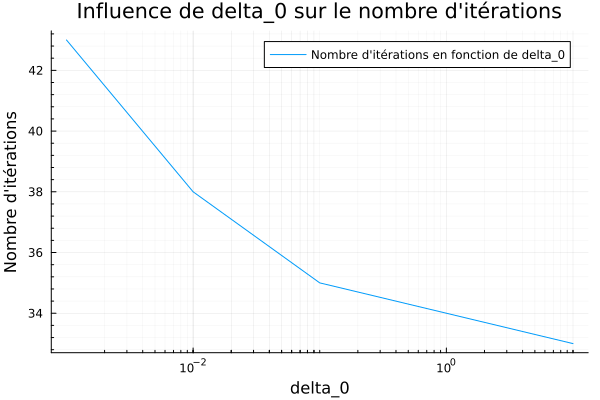

In [5]:
using Plots

# exprerimentations numériques

include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

f1 = fct1
grad_f1 = grad_fct1
Hess_f1 = hess_fct1
x0_f1 = [1; 0; 0]


# Influence de delta_0 sur le nombre d'itérations

delta_0 = [10, 1.0, 0.1, 0.01, 0.001]
nbs_iters = []
for i in delta_0
    x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(f1, grad_f1, Hess_f1, x0_f1, Δ0=i, algo_pas="cauchy")
    push!(nbs_iters, nb_iters)
end

plot(delta_0, nbs_iters, xscale=:log10, minorgrid=true, xlabel="delta_0", ylabel="Nombre d'itérations", label="Nombre d'itérations en fonction de delta_0")
title!("Influence de delta_0 sur le nombre d'itérations")

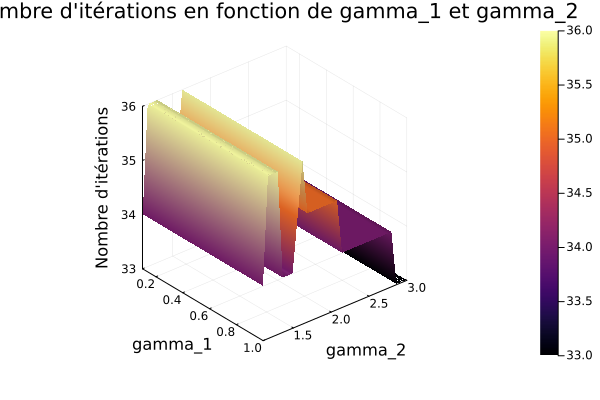

In [4]:
# Influence de γ1 et γ2 sur le nombre d'itérations

gamma_1 = range(0.1, 1, length=100)
gamma_2 = range(1.1, 3, length=30)
#= nbs_iters = []
for i in 1:length(gamma_1)
    for j in 1:length(gamma_2)
        x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(f1, grad_f1, Hess_f1, x0_f1, γ1=gamma_1[i], γ2=gamma_2[j], algo_pas="cauchy")
        push!(nbs_iters, nb_iters) 
    end
end =#

function f_nbs_iters(i, j) 
    x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(f1, grad_f1, Hess_f1, x0_f1, γ1=i, γ2=j, Δ0=0.2, Δmax=200, algo_pas="cauchy")
    return nb_iters
end


# Courbe du nombre d'itérations en fonction de γ1 et γ2 (en 3D)

plot(gamma_1, gamma_2, f_nbs_iters, camera=(50, 30) , st=:surface)
xlabel!("gamma_1")
ylabel!("gamma_2")
zlabel!("Nombre d'itérations")
title!("Nombre d'itérations en fonction de gamma_1 et gamma_2")


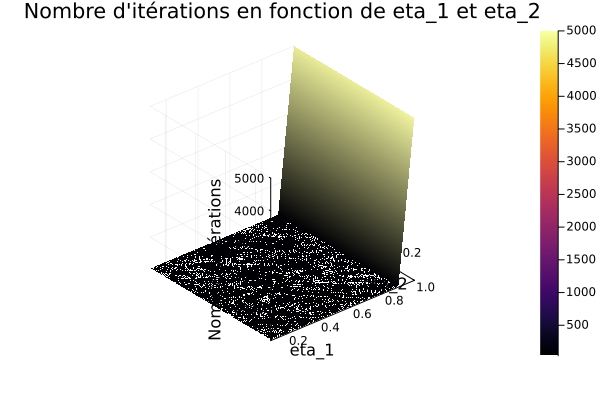

In [3]:
# Influence de η1 et η2 sur le nombre d'itérations

eta_1 = range(0.1, 1, length=10)
eta_2 = range(0.1, 0.9, length=10)
#= nbs_iters = []
for i in 1:length(eta_1)
    x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(f1, grad_f1, Hess_f1, x0_f1, η1=eta_1[i], η2=eta_2[i], algo_pas="cauchy")
    push!(nbs_iters, nb_iters)
end =#

function f_nbs_iters2(i, j)
    x_sol, f_sol, flag, nb_iters, _ = regions_de_confiance(f1, grad_f1, Hess_f1, x0_f1, η1=i, η2=j, algo_pas="cauchy")
    return nb_iters
end

# Courbe du nombre d'itérations en fonction de η1 et η2 (en 3D)

plot(eta_1, eta_2, f_nbs_iters2, camera=(-40, 30) , st=:surface)
xlabel!("eta_1")
ylabel!("eta_2")
zlabel!("Nombre d'itérations")
title!("Nombre d'itérations en fonction de eta_1 et eta_2")


Avec ces différents paramètres, on a construit les graphiques suivants :

    - Le nombre d'itérations en fonction du rayon de la région de confiance initial
    - Le nombre d'itérations en fonction de $\gamma_1$ et $\gamma_2$
    - Le nombre d'itérations en fonction de $\eta_1$ et $\eta_2$

On observe que la valeur du rayon de la région de confiance initial est déterminante pour le nombre d'itération. En effet, on parvient a diminuer le nombre d'itération en augmentant cette valeur. Cependant, il faut faire attention à ne pas trop augmenter cette valeur car on peut alors avoir des problèmes de convergence. 

On note aussi que la valeur de $\gamma_1$ a peu/pas d'influence sur le nombre d'itération. Alors que certaines valeurs de $\gamma_2$ permettent d'accélérer la convergence.

Enfin, on observe que si la valeur de $\eta_1$ est supérieur à 0.8 alors on ne parvient plus a converger (ou difficilement). Alors que la valeur de $\eta_2$ n'a semble pas avoir une grande influence sur le nombre d'itération.


# Régions de confiance avec gradient conjugué tronqué

## Implémentation 

1. Implémenter l’algorithme du gradient conjugué tronqué (fichier `src/gct.jl`). Sa spécification est dans le fichier.
2. Vérifier que les tests ci-dessous passent.

In [22]:
include("../src/gct.jl")
include("../test/tester_gct.jl")

#
tester_gct(gct);

Test Summary:             | Pass  Total  Time
Gradient conjugué tronqué |    9      9  0.0s


3. Intégrer l’algorithme du gradient conjugué tronqué dans le code des régions de confiance.
4. Vérifier que les tests ci-dessous passent.

In [23]:
include("../src/Regions_De_Confiance.jl")
include("../test/tester_rc_gct.jl")

#
afficher = false # si true, alors affiche les résultats des algorithmes

#
tester_rc_gct(regions_de_confiance, afficher);

Affichage des résultats des algorithmes : false



Test Summary: | Pass  Total  Time
RC et gct     |   15     15  0.7s


## Interprétation  

Nous proposons de comparer l'utilisation du pas de Cauchy avec celle du gradient conjugué tronqué dans l'algorithme des régions de confiance.

**Remarques.**
* Nous vous demandons de réaliser des expérimentations numériques pour les comparaisons demandées ci-après.
* Vous devez utiliser l'argument optionnel `max_iter_gct` et la sortie `xs` de l'algorithme des régions de confiance.
* Vous pouvez comparer l'écart en norme entre les itérés de l'algorithme et la solution du problème.
* Vous trouverez des choses utiles dans le fichier `test/fonctions_de_tests.jl`.

1. Comparer dans le cas où l'on force le gradient conjugué tronqué à ne faire qu'une seule itération. Que remarquez vous ?
2. Comparer dans le cas général. Que remarquez vous ?
3. Quels sont les avantages et inconvénients des deux approches ?

Solution par gct : [1, 1, 1]
Solution par cauchy : [1, 1, 1]


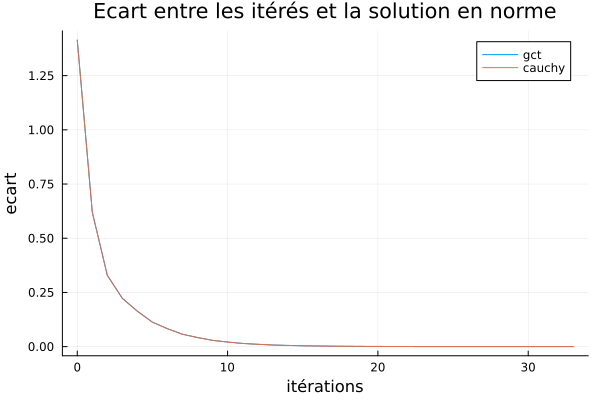

In [34]:
using Plots

# 1. Comparaison des deux algorithmes avec une itération pour gct.

include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

max_iter_gct = 1
x0_f1 = [1; 0; 0]
solution = [1; 1; 1]

x_sol_gct, f_sol_gct, flag_gct, nb_iters_gct, xs_gct = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0_f1, algo_pas="gct", max_iter_gct=max_iter_gct) 
x_sol_cauchy, f_sol_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0_f1, algo_pas="cauchy")

# 1.1 Comparaison des ecarts en norme etre les itérés et la solution

ecart_gct = []
ecart_cauchy = []

for i in 1:length(xs_gct)
    push!(ecart_gct, norm(xs_gct[i] - solution))
end
for i in 1:length(xs_cauchy)
    push!(ecart_cauchy, norm(xs_cauchy[i] - solution))
end

print("Solution par gct : ", solution, "\n")
print("Solution par cauchy : ", solution, "\n")

plot(0:(length(xs_gct)-1), ecart_gct, label="gct", xlabel="itérations", ylabel="ecart", title="Ecart entre les itérés et la solution en norme")
plot!(0:(length(xs_cauchy)-1), ecart_cauchy, label="cauchy")


1. Lorsque l'on force le gradient conjugué tronqué à ne faire qu'une seule itération, on remarque que les deux algorithmes sont équivalents en nombre d'itérations et en vitesse de convergence.

Solution par gct : [1, 1, 1]
Solution par cauchy : [1, 1, 1]


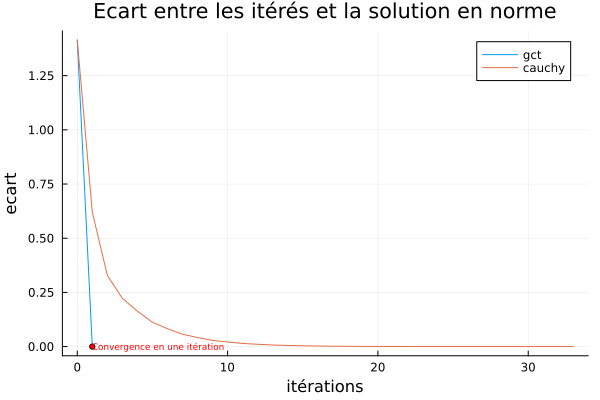

In [58]:
using Plots

include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

# 2. Comparaison des deux algorithmes avec 6 itérations pour gct (la valeur par defaut).

max_iter_gct = 6
x0_f1 = [1; 0; 0]
solution = [1; 1; 1]

x_sol_gct, f_sol_gct, flag_gct, nb_iters_gct, xs_gct = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0_f1, algo_pas="gct", max_iter_gct=max_iter_gct)
x_sol_cauchy, f_sol_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy = regions_de_confiance(fct1, grad_fct1, hess_fct1, x0_f1, algo_pas="cauchy")

# 1.2 Comparaison des ecarts en norme etre les itérés et la solution

ecart_gct = []
ecart_cauchy = []

for i in 1:length(xs_gct)
    push!(ecart_gct, norm(xs_gct[i] - solution))
end
for i in 1:length(xs_cauchy)
    push!(ecart_cauchy, norm(xs_cauchy[i] - solution))
end

print("Solution par gct : ", solution, "\n")
print("Solution par cauchy : ", solution, "\n")

plot(0:(length(xs_gct)-1), ecart_gct, label="gct", xlabel="itérations", ylabel="ecart", title="Ecart entre les itérés et la solution en norme")
plot!(0:(length(xs_cauchy)-1), ecart_cauchy, label="cauchy")
scatter!([nb_iters_gct], [0], label="", color="red", markersize=3, series_annotations = text("Convergence en une itération", 6, :left, :red))



2. Lorsque l'on ne force pas le gradient conjugué tronqué à ne faire qu'une seule itération, on remarque que l'algorithme du gradient conjugué tronqué est plus rapide que l'algorithme du pas de Cauchy. En effet, le gradient conjugué tronqué permet de trouver le minimum en une seule itération des regions de confiance. Alors que le pas de cauchy necessite une trentaine d'itérations.

Ici le gradient conjugué converge en une itération car le problème est quadratique.

Solution par gct : [1, 1]
Solution par cauchy : [1, 1]
Nombre d'itérations par gct : 22
Nombre d'itérations par cauchy : 5000
Flag par gct : 0
Flag par cauchy : 3


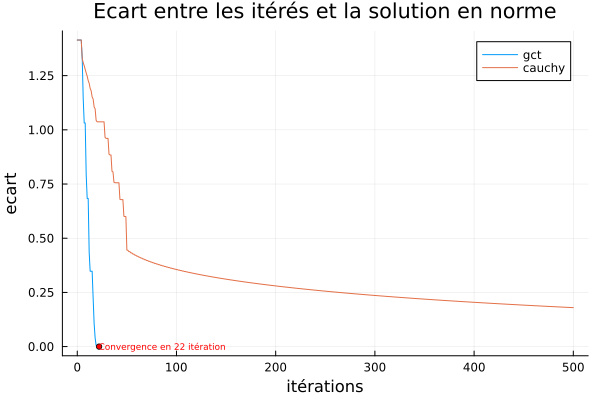

In [72]:
using Plots

include("../src/Regions_De_Confiance.jl")
include("../test/fonctions_de_tests.jl")

# 2.2. Comparaison des deux algorithmes avec 6 itérations pour gct (la valeur par defaut).

max_iter_gct = 6
x0_f1 = [0; 0]
solution = [1; 1]

x_sol_gct, f_sol_gct, flag_gct, nb_iters_gct, xs_gct = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0_f1, algo_pas="gct", max_iter_gct=max_iter_gct)
x_sol_cauchy, f_sol_cauchy, flag_cauchy, nb_iters_cauchy, xs_cauchy = regions_de_confiance(fct2, grad_fct2, hess_fct2, x0_f1, algo_pas="cauchy")

# 1.2 Comparaison des ecarts en norme etre les itérés et la solution

ecart_gct = []
ecart_cauchy = []

for i in 1:length(xs_gct)
    push!(ecart_gct, norm(xs_gct[i] - solution))
end
for i in 1:length(xs_cauchy)
    push!(ecart_cauchy, norm(xs_cauchy[i] - solution))
end

print("Solution par gct : ", solution, "\n")
print("Solution par cauchy : ", solution, "\n")
print("Nombre d'itérations par gct : ", nb_iters_gct, "\n")
print("Nombre d'itérations par cauchy : ", nb_iters_cauchy, "\n")
print("Flag par gct : ", flag_gct, "\n")
print("Flag par cauchy : ", flag_cauchy, "\n")

plot(0:(length(xs_gct)-1), ecart_gct, label="gct", xlabel="itérations", ylabel="ecart", title="Ecart entre les itérés et la solution en norme")
plot!(0:500, ecart_cauchy[1:501], label="cauchy")
scatter!([nb_iters_gct], [0], label="", color="red", markersize=3, series_annotations = text("Convergence en 22 itération", 6, :left, :red))


Lorsque l'on teste sur une fonction non quadratique, on remarque que le gradient conjugué tronqué ne converge pas en une itération. Cependant, il converge toujours plus rapidement que le pas de Cauchy : 22 itérations, alors que le pas de Cauchy n'a pas convergé au bout de 5000 itérations.


3. Le gradient conjugué tronqué est donc plus rapide que le pas de cauchy cependant il est plus compliqué à implémenter et plus couteux en calculs et en mémoire.